- Financial Price Series works with financial price series datga nd applies the RNN approach to predict a series directly vid estimation.

- Financial Return Series works with returns data to predict the future direction of the price of a financial intrument via an estimation approach.

- Financial Features adds financial features to the mix to predict the marekt direction.

# Fist Example



In [ ]:
# import and configure
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pprint import pprint
from pylab import plt, mpl
# pd.set_option('precision', 4)

In [ ]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds

<function __main__.set_seeds(seed=100)>

In [ ]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
# reshaping to two dimension
a = a.reshape(len(a), -1)
a.shape

(100, 1)

In [ ]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

Using the `TimeseriesGenerator`, the raw data can be transformed into an object suited for the training of an RNN. The idea is to use a certain number of lags of the original data to train the model to predict the next value in the sequence.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
lags = 3

In [ ]:
# TimeseriesGenerator creates batches of lagged sequential data.
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [ ]:
list(g)

[(array([[[0],
          [1],
          [2]],
  
         [[1],
          [2],
          [3]],
  
         [[2],
          [3],
          [4]],
  
         [[3],
          [4],
          [5]],
  
         [[4],
          [5],
          [6]]]),
  array([[3],
         [4],
         [5],
         [6],
         [7]])),
 (array([[[ 5],
          [ 6],
          [ 7]],
  
         [[ 6],
          [ 7],
          [ 8]],
  
         [[ 7],
          [ 8],
          [ 9]],
  
         [[ 8],
          [ 9],
          [10]],
  
         [[ 9],
          [10],
          [11]]]),
  array([[ 8],
         [ 9],
         [10],
         [11],
         [12]])),
 (array([[[10],
          [11],
          [12]],
  
         [[11],
          [12],
          [13]],
  
         [[12],
          [13],
          [14]],
  
         [[13],
          [14],
          [15]],
  
         [[14],
          [15],
          [16]]]),
  array([[13],
         [14],
         [15],
         [16],
         [17]])),
 (array([

In [ ]:
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [ ]:
# a simple single RNN
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [ ]:
model = Sequential()
# the single hidden layer is of type SimpleRNN
model.add(SimpleRNN(100, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adagrad', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time
h = model.fit(g, epochs=1000, steps_per_epoch=5, verbose=False)

CPU times: user 44.1 s, sys: 1.63 s, total: 45.8 s
Wall time: 56.5 s


In [ ]:
res = pd.DataFrame(h.history)
res.tail(3)

,loss,mae
997,0.613729,0.731457
998,0.580316,0.597579
999,1.120345,0.822286


<Axes: >

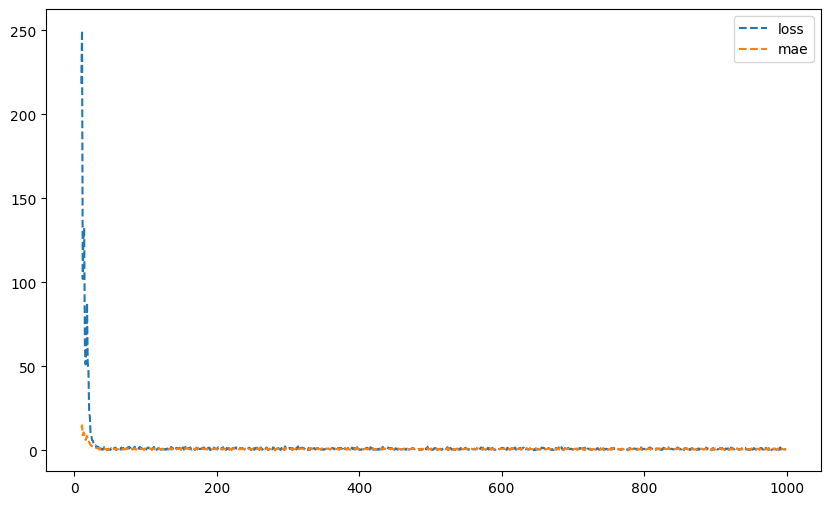

In [ ]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--'])

In [ ]:
# generates in-sample and out-of-sample predictions
x = np.array([21, 22, 23]).reshape(1, lags, 1)
x

array([[[21],
        [22],
        [23]]])

In [ ]:
y = model.predict(x, verbose=False)

In [ ]:
int(round(y[0, 0]))

23

In [ ]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)

In [ ]:
int(round(y[0, 0]))

90

In [ ]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [ ]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1218

# Second Example

The input data is transformed by a quadratic term and a trigonometirc term.

In [ ]:
def transform(x):
    # deterministic transformation
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    # stochastic transformation
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

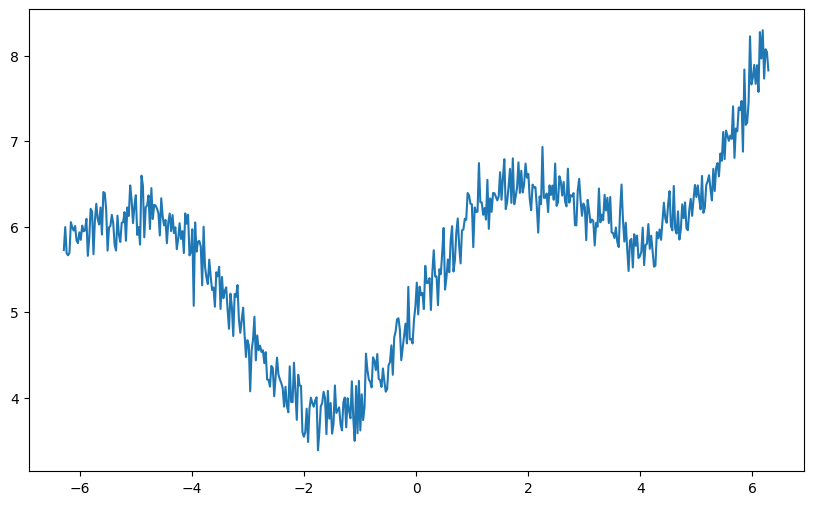

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, a)

In [ ]:
a = a.reshape((len(a), -1))

In [ ]:
a[:5]

array([[5.72589702],
       [5.99449827],
       [5.68581773],
       [5.66476052],
       [5.69407919]])

In [ ]:
lags = 5

In [ ]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [ ]:
model = Sequential()
model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 500)               251000    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 251501 (982.43 KB)
Trainable params: 251501 (982.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10, verbose=False)

CPU times: user 1min 16s, sys: 5.83 s, total: 1min 22s
Wall time: 1min 12s


In [ ]:
# predicts sequence values for the interval [-6\pi, 6\pi]
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
d = transform(x)

In [ ]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [ ]:
f = list(g_)[0][0].reshape((len(d)-lags, lags, 1))

In [ ]:
y = model.predict(f, verbose=False)

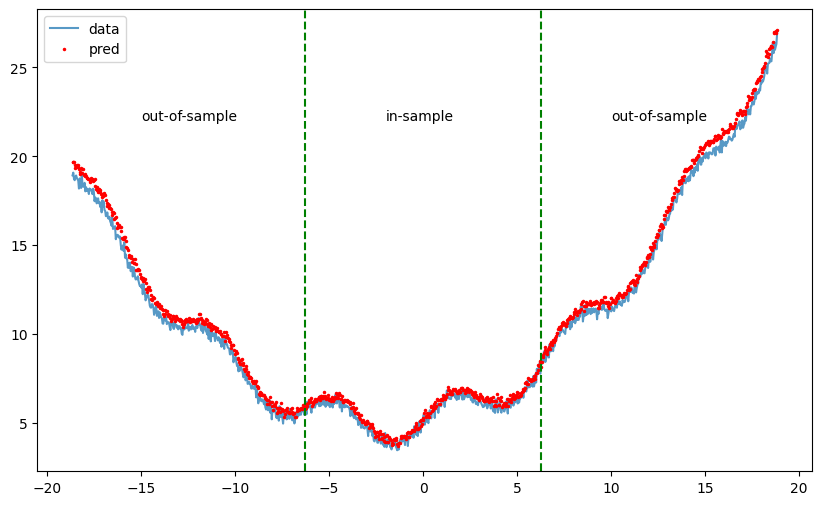

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)
plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')
plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend()

# Financial Price Series

As a first application of RNNs to financial time series data, consider intraday EUR/USD quotes.

In [ ]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [ ]:
symbol = 'EUR_USD'

In [ ]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [ ]:
def generatge_data():
    # select a single column
    data = pd.DataFrame(raw['CLOSE'])
    # renames the column
    data.columns = [symbol]
    # resample the data
    data = data.resample('30min', label='right').last().ffill()
    return data

In [ ]:
data = generatge_data()

In [ ]:
# applies Gaussian normalization
data = (data - data.mean()) / data.std()

In [ ]:
data

,EUR_USD
Date,
2019-10-01 00:30:00,-2.711169
2019-10-01 01:00:00,-2.758273
2019-10-01 01:30:00,-2.821080
2019-10-01 02:00:00,-2.852483
2019-10-01 02:30:00,-2.915289
...,...
2019-12-31 21:30:00,2.203404
2019-12-31 22:00:00,2.140598
2019-12-31 22:30:00,2.187702


In [ ]:
# reshapes the data set to two dimentions
p = data[symbol].values
p = p.reshape((len(p), -1))
p

array([[-2.71116895],
       [-2.75827348],
       [-2.82107952],
       ...,
       [ 2.18770229],
       [ 2.18770229],
       [ 2.18770229]])

In [ ]:
lags = 5

In [ ]:
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

In [ ]:
def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN', features=1,
                     algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        # adds a SimpleRNN layer or LSTM layer
        model.add(SimpleRNN(hu, activation='relu', input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu', input_shape=(lags, features)))

    if algorithm == 'estimation':
        # adds an outpu layer for estimation or classification
        model.add(Dense(1, activation='linear'))
    else:
        model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

In [ ]:
model = create_rnn_model()

In [ ]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10, verbose=False)

CPU times: user 32.3 s, sys: 1e+03 ms, total: 33.3 s
Wall time: 32.5 s


In-sample preduction is generated. The RNN is capable of capturting the structure of the normalized financial time series data.

In [ ]:
y = model.predict(g, verbose=False)

In [ ]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()

<Axes: xlabel='Date'>

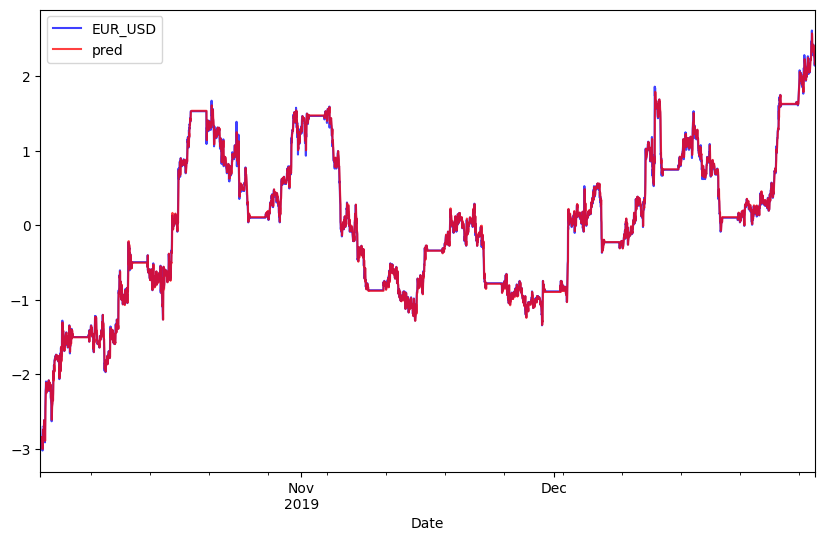

In [ ]:
data[[symbol, 'pred']].plot(figsize=(10, 6), style=['b', 'r-'], alpha=0.75)

The visualization suggests a result that does not hold up upon closer inspection. Zooming in and only showing 50 data points makes it clear that the prediction values from the RNN are basically just the most previous lag, shifted by one time interval.

The application of an RNN to price data illustrates the EMH, today's price is the best prediction for tomorrow's price. The application of an RNN to price data does not yield any other insight.

<Axes: xlabel='Date'>

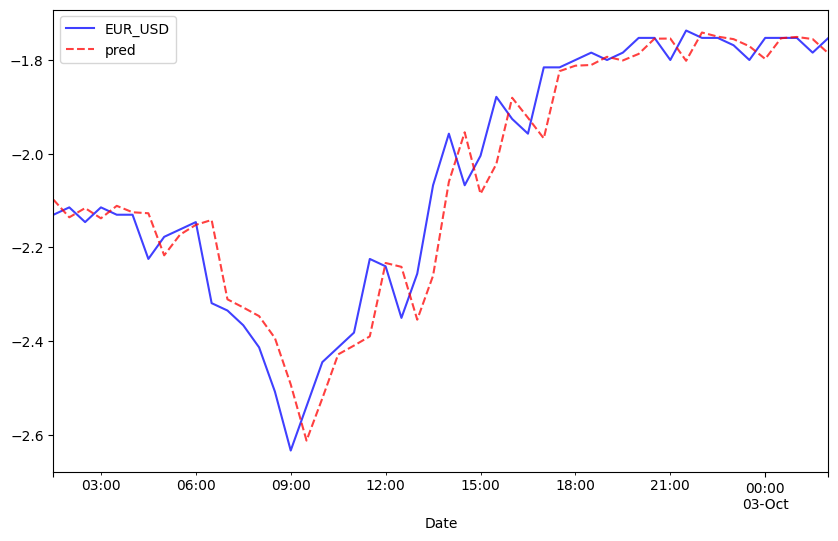

In [ ]:
data[[symbol, 'pred']].iloc[50:100].plot(figsize=(10, 6), style=['b', 'r--'], alpha=0.75)

# Financial Return Series

In [ ]:
data = generatge_data()

In [ ]:
data['r'] = np.log(data / data.shift(1))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = (data - data.mean()) / data.std()

In [ ]:
r = data['r'].values
r = r.reshape((len(r), -1))

In [ ]:
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)

In [ ]:
model = create_rnn_model()

In [ ]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10, verbose=False)

CPU times: user 31.6 s, sys: 981 ms, total: 32.6 s
Wall time: 33.2 s


In [ ]:
y = model.predict(g, verbose=False)

In [ ]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()
data.dropna(inplace=True)

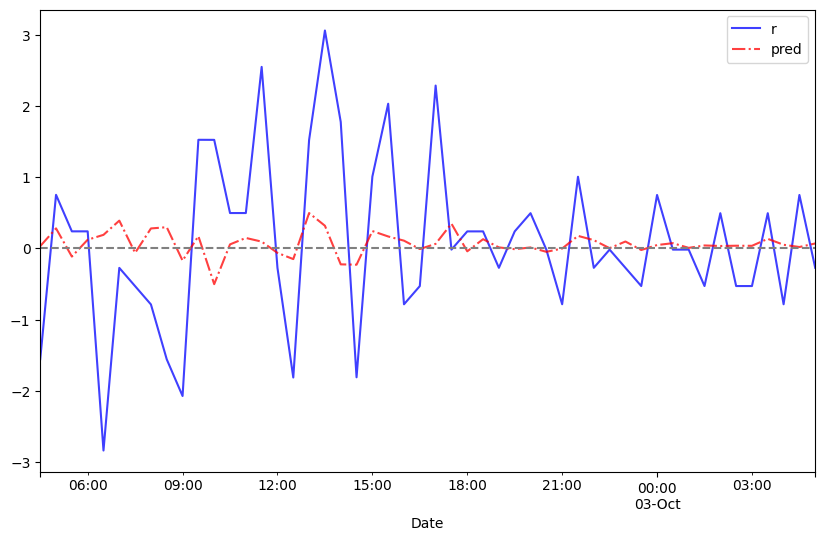

In [ ]:
data[['r', 'pred']].iloc[50:100].plot(figsize=(10, 6), style=['b', 'r-.'], alpha=0.75)
plt.axhline(0, c='grey', ls='--')

The RNN's predictions are not too good in absolute terms, However, they seem to get the market direction (sign of return) somehow right.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.6470855069176684

In [ ]:
3 # train-test split
split = int(len(r) * 0.8)
train = r[:split]
test = r[split:]

In [ ]:
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [ ]:
set_seeds()
model = create_rnn_model(hu=100)

In [ ]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10, verbose=False)

CPU times: user 7.76 s, sys: 176 ms, total: 7.94 s
Wall time: 7.83 s


In [ ]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)
y = model.predict(g_)

176/176 [==============================] - 0s 2ms/step


In [ ]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.6753986332574032

To get a realistic picture, a train-test split is in order. The accuracy score out-of-sample is not as high as the one seen for the whole data set in-sample, but it is still high for the problem at hand.

# Financial Features

Additional features can be included to imporve the prediction of the RNN: adds typical financial features to the data set.

In [ ]:
data = generatge_data()

In [ ]:
data['r'] = np.log(data / data.shift(1))

In [ ]:
window = 20
# add momentum
data['mom'] = data['r'].rolling(window).mean()
# add volatility
data['vol'] = data['r'].rolling(window).std()

data.dropna(inplace=True)

## Estimation

The out-of-sample accuracy drops significantly in the estimation case. In other words, there is no improvement observed from adding financial features in this particular case in the text book. (But my analysis still shows high accuracy score.) Anyway it seems that there are no more upside.

In [ ]:
split = int(len(data) * 0.8)

In [ ]:
train = data.iloc[:split].copy()

In [ ]:
mu, std = train.mean(), train.std()

In [ ]:
train = (train - mu) / std

In [ ]:
test = data.iloc[split:].copy()

In [ ]:
test = (test - mu) / std

In [ ]:
g = TimeseriesGenerator(train.values, train['r'].values, length=lags, batch_size=5)

In [ ]:
set_seeds()
model = create_rnn_model(hu=100, features=len(data.columns), layer='SimpleRNN')

In [ ]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10, verbose=False)

CPU times: user 7.42 s, sys: 193 ms, total: 7.61 s
Wall time: 7.8 s


In [ ]:
g_ = TimeseriesGenerator(test.values, test['r'].values, length=lags, batch_size=5)

In [ ]:
y = model.predict(g_).flatten()

175/175 [==============================] - 1s 2ms/step


In [ ]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.6739130434782609

## Classification

The analyses use a Keras RNN model for estimation to predict the future direction of the price of the financial instrument. The problem is probably better cast directly into a classification setting. It also works with this time with an LSTM layer. The out-of-sample accuracy is quite high even for a relatively small number of hidden units and only a few training epochs.

The approach again takes clss imbalance into account by adjusting the class weight appropriately.

In [ ]:
set_seeds()
model = create_rnn_model(hu=50, features=len(data.columns), layer='LSTM', algorithm='classificiation')

In [ ]:
train_y = np.where(train['r'] > 0, 1, 0)

In [ ]:
np.bincount(train_y)

array([2374, 1142])

In [ ]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [ ]:
g = TimeseriesGenerator(train.values, train_y, length=lags, batch_size=5)

In [ ]:
%%time
model.fit(g, epochs=5, steps_per_epoch=10, verbose=False, class_weight=cw(train_y))

CPU times: user 2.5 s, sys: 40.1 ms, total: 2.54 s
Wall time: 2.86 s


In [ ]:
test_y = np.where(test['r'] > 0, 1, 0)

In [ ]:
g_ = TimeseriesGenerator(test.values, test_y, length=lags, batch_size=5)

In [ ]:
y = np.where(model.predict(g_, batch_size=None) > 0.5, 1, 0).flatten()

175/175 [==============================] - 1s 3ms/step


In [ ]:
np.bincount(y)

array([530, 344])

In [ ]:
accuracy_score(test_y[lags:], y)

0.6064073226544623

## Deep RNN

In [125]:
from keras.layers import Dropout

In [134]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=1, dropout=False,
                          rate=0.3, seed=100):
    # a minimum of two hidden layers is ensured
    if hl <= 2: hl =2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    # first layer
    model.add(layer(hu, input_shape=(lags, features), return_sequences=True))

    if dropout:
        model.add(Dropout(rate, seed=seed))

    # hidden layers
    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))

    # final hidden layer
    model.add(layer(hu))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [135]:
set_seeds()
model = create_deep_rnn_model(hl=2, hu=50, layer='SimpleRNN',
                              features=len(data.columns), dropout=True, rate=0.3)

In [136]:
%%time
model.fit(g, epochs=200, steps_per_epoch=10, verbose=False, class_weight=cw(train_y))

CPU times: user 20.7 s, sys: 658 ms, total: 21.4 s
Wall time: 26.1 s


In [137]:
y = np.where(model.predict(g_, batch_size=None) > 0.5, 1, 0).flatten()

175/175 [==============================] - 1s 2ms/step


In [138]:
np.bincount(y)

array([419, 455])

In [139]:
accuracy_score(test_y[lags:], y)

0.5869565217391305

One major difference is that the trainig and test data must necessarily be presented in a sequentail form to the respective methods. This is made easy by the application of the `TimeseriesGenerator` function, which transforms sequential data into a generator object that `Keras` RNNs can work with.